<a href="https://colab.research.google.com/github/raffiainuls/Tugasbesar/blob/main/Model_CNN_PM_Tugas_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.preprocessing import image
from keras.utils import np_utils
## --------------------------------------------
import pandas as pd
import numpy as np

In [2]:

!pip install keras==2.1.1

     |████████████████████████████████| 302 kB 30.3 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.0 requires keras<2.8,>=2.7.0rc0, but you have keras 2.1.1 which is incompatible.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [4]:
(x_train.shape,x_test.shape)
(y_train.shape,y_test.shape)

((50000, 1), (10000, 1))

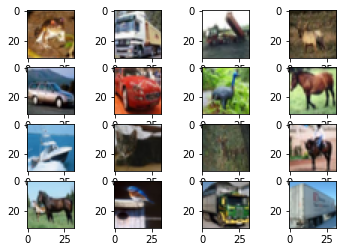

In [5]:
import numpy as np
import matplotlib.pyplot as plt
m=4
k=0
plt.figure(1)
for i in range(0,m):
  for j in range(0,m):
    plt.subplot2grid((m,m),(i,j))
    plt.imshow(x_train[k])
    k=k+1
plt.show()


In [6]:
x_train = x_train.reshape(50000, 32, 32, 3).astype('float32')

x_test = x_test.reshape(10000, 32, 32, 3).astype('float32')

x_train/=255

x_test/=255
print("Data setelah di-normalisasi ", x_train[0][0][0])
print("Data setelah di-normalisasi ", x_test[0][0][0])

Data setelah di-normalisasi  [0.23137255 0.24313726 0.24705882]
Data setelah di-normalisasi  [0.61960787 0.4392157  0.19215687]


In [7]:

y_train = np_utils.to_categorical(y_train, num_classes=100)
y_test = np_utils.to_categorical(y_test, num_classes=100)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, GlobalMaxPooling2D, AveragePooling2D, GlobalMaxPooling2D, BatchNormalization, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam


In [9]:
Pertama = Sequential()

Pertama.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(32,32,3), activation='relu'))

Pertama.add(MaxPool2D(pool_size=(2,2)))

Pertama.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

Pertama.add(MaxPool2D(pool_size=(2,2)))
Pertama.add(Dropout(0.25))
Pertama.add(BatchNormalization())
Pertama.add(Flatten())

Pertama.add(Dense(units=1024, activation='relu'))
Pertama.add(Dense(units=256, activation='relu'))
Pertama.add(Dense(units=256, activation='relu'))
Pertama.add(Dense(units=100, activation='softmax'))

learning_rate=0.00001

Pertama.compile(loss='categorical_crossentropy', optimizer=Adam(lr=learning_rate), metrics=['accuracy'])

gerador_imagens = ImageDataGenerator(rotation_range=7,
                                     horizontal_flip = True,
                                     shear_range = 0.2,
                                     height_shift_range = 0.07,
                                     zoom_range = 0.2)
gerador_teste = ImageDataGenerator()

base_treinamento = gerador_imagens.flow(x_train, y_train, batch_size=128)
base_teste = gerador_teste.flow(x_test, y_test, batch_size=128)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:368: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [10]:
H =Pertama.fit_generator(base_treinamento, steps_per_epoch=50000/128, epochs=15, validation_data=base_teste, validation_steps=10000/128)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1963: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
390/390 [==============================] - 76s 191ms/step - loss: 3.4900 - accuracy: 0.1619 - val_loss: 3.1314 - val_accuracy: 0.3148
Epoch 2/15
390/390 [==============================] - 75s 192ms/step - loss: 1.9688 - accuracy: 0.3319 - val_loss: 1.8093 - val_accuracy: 0.4024
Epoch 3/15
390/390 [==============================] - 75s 193ms/step - loss: 1.7443 - accuracy: 0.3794 - val_loss: 1.6356 - val_accuracy: 0.4349
Epoch 4/15
390/390 [==============================] - 75s 192ms/step - loss: 1.6558 - accuracy: 0.4089 - val_loss: 1.5606 - val_accuracy: 0.4547
Epoch 5/15
390/390 [==============================] - 75s 193ms/step - loss: 1.6019 - accuracy: 0.4261 - val_loss: 1.5043 - val_accuracy: 0.4681
Epoch 6/15
390/390 [==============================] - 75s 193ms/step - loss: 1.5533 - accuracy: 0.4417 - val_loss: 1.4537 - val_accuracy: 0.4857
Epoch 7/15
390/390 [==============================] - 75s 192ms/step - loss: 1.5193 - accuracy: 0.4565 - val_loss: 1.4235 - val_ac

In [11]:
Pertama.evaluate(x_test, y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.2897 - accuracy: 0.5402


[1.2896819114685059, 0.5401999950408936]

In [ ]:
Pertama.save("model3.h5")
print("Saved model to disk")

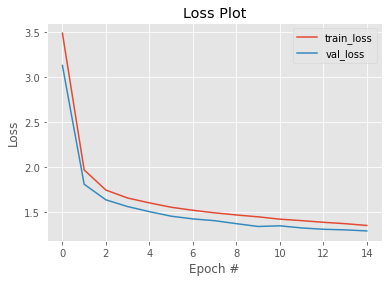

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

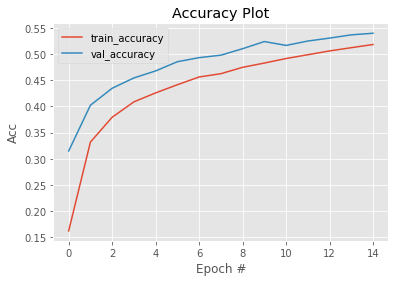

In [14]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["accuracy"], label="train_accuracy")
plt.plot(np.arange(0, 15), H.history["val_accuracy"], label="val_accuracy")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import classification_report

pred = Pertama.predict(x_train)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_train, labels))

              precision    recall  f1-score   support

           0       0.79      0.39      0.52      5000
           1       0.68      0.69      0.68      5000
           2       0.78      0.09      0.17      5000
           3       0.71      0.03      0.06      5000
           4       0.73      0.18      0.28      5000
           5       0.74      0.17      0.28      5000
           6       0.63      0.68      0.65      5000
           7       0.79      0.47      0.59      5000
           8       0.81      0.50      0.61      5000
           9       0.71      0.48      0.58      5000
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
